<a href="https://colab.research.google.com/github/aflah02/TensorFlow-API-Tutorials/blob/main/tf_RaggedTensorAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow import RaggedTensor

# Ragged Tensors

Source: [TensorFlow Documentation](https://www.tensorflow.org/api_docs/python/tf/RaggedTensor)

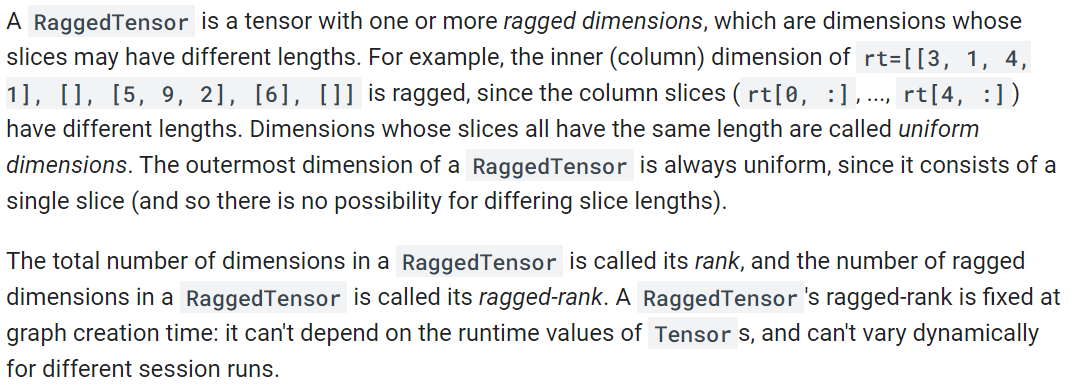

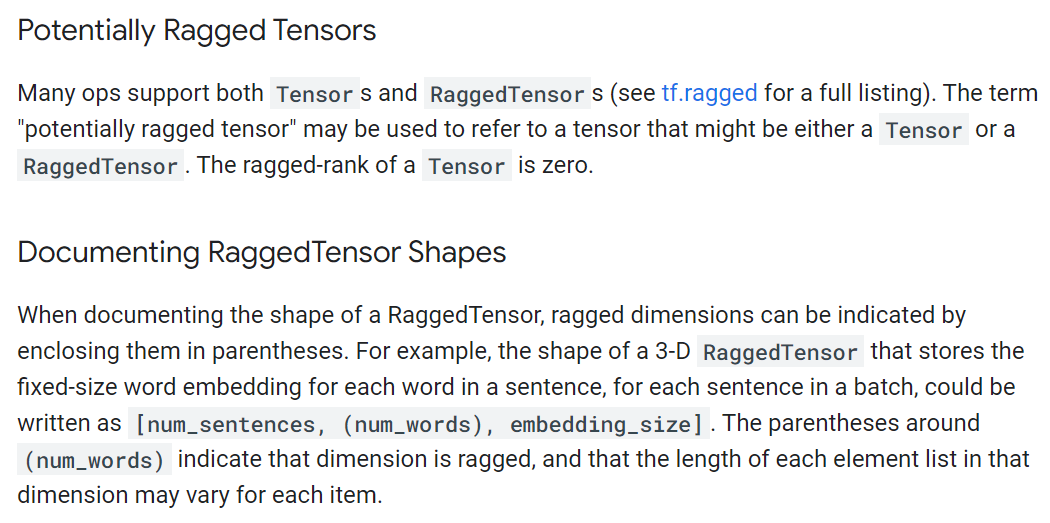

## Internal Structure of a Ragged Tensor

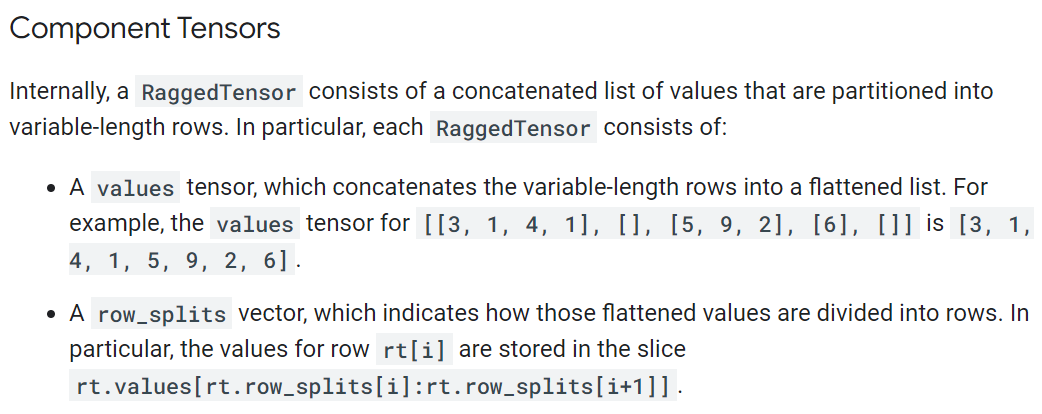

In [8]:
print(tf.RaggedTensor.from_row_splits(
      values=[3, 1, 4, 1, 5, 9, 2, 6],
      row_splits=[0, 4, 4, 7, 8, 8]))

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], []]>


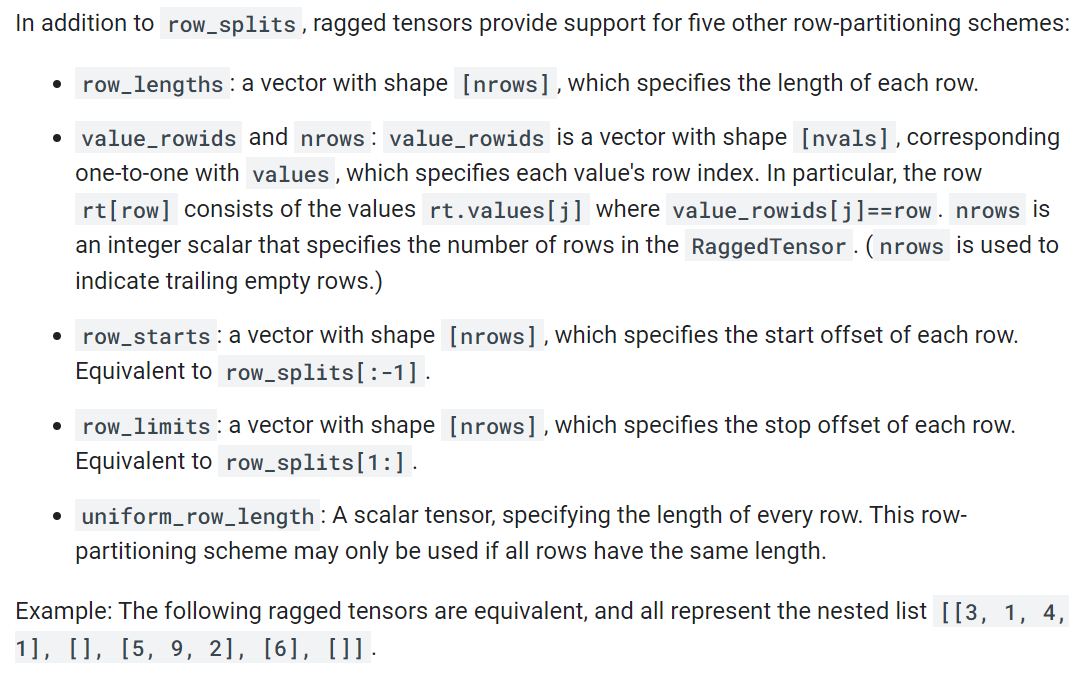

In [10]:
values = [3, 1, 4, 1, 5, 9, 2, 6]

In [11]:
RaggedTensor.from_row_splits(values, row_splits=[0, 4, 4, 7, 8, 8])

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], []]>

In [12]:
RaggedTensor.from_row_lengths(values, row_lengths=[4, 0, 3, 1, 0])

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], []]>

In [13]:
RaggedTensor.from_value_rowids(
    values, value_rowids=[0, 0, 0, 0, 2, 2, 2, 3], nrows=5)

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], []]>

In [18]:
RaggedTensor.from_row_starts(values, row_starts=[0, 4, 4, 7, 8])

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], []]>

In [15]:
RaggedTensor.from_row_limits(values, row_limits=[4, 4, 7, 8, 8])

<tf.RaggedTensor [[3, 1, 4, 1], [], [5, 9, 2], [6], []]>

In [16]:
RaggedTensor.from_uniform_row_length(values, uniform_row_length=2)

<tf.RaggedTensor [[3, 1],
 [4, 1],
 [5, 9],
 [2, 6]]>

# Multiple Ragged Dimensions
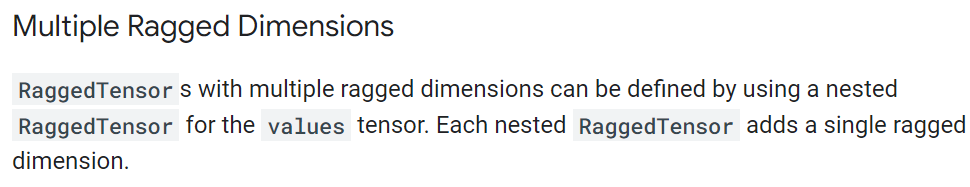

In [21]:
inner_rt = RaggedTensor.from_row_splits(  # =rt1 from above
    values=[3, 1, 4, 1, 5, 9, 2, 6], row_splits=[0, 4, 4, 7, 8, 8])
outer_rt = RaggedTensor.from_row_splits(
    values=inner_rt, row_splits=[0, 3, 3, 5])
print(outer_rt.to_list())
print(outer_rt.ragged_rank)

[[[3, 1, 4, 1], [], [5, 9, 2]], [], [[6], []]]
2


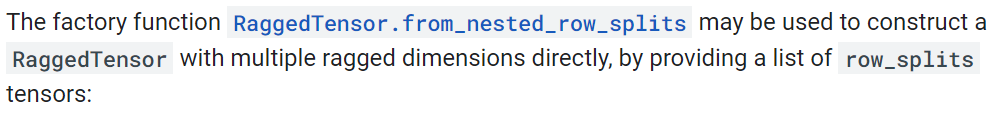

In [24]:
RaggedTensor.from_nested_row_splits(
    flat_values=[3, 1, 4, 1, 5, 9, 2, 6],
    nested_row_splits=([0, 3, 3, 5], [0, 4, 4, 7, 8, 8])).to_list()

[[[3, 1, 4, 1], [], [5, 9, 2]], [], [[6], []]]

# Uniform Inner Dimensions

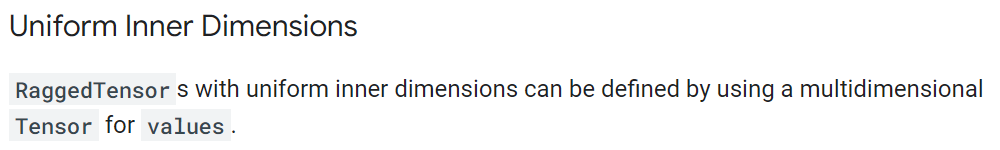

In [26]:
rt = RaggedTensor.from_row_splits(values=tf.ones([5, 3], tf.int32),
                                  row_splits=[0, 2, 5])
print(rt.to_list())
print(rt.shape)

[[[1, 1, 1], [1, 1, 1]], [[1, 1, 1], [1, 1, 1], [1, 1, 1]]]
(2, None, 3)


# Uniform Outer Dimensions

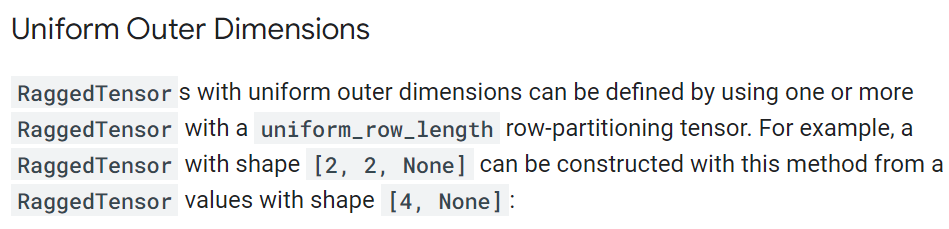

In [29]:
values = tf.ragged.constant([[1, 2, 3], [4], [5, 6], [7, 8, 9, 10]])
print(values.shape)
rt6 = tf.RaggedTensor.from_uniform_row_length(values, 2)
print(rt6)
print(rt6.shape)

(4, None)
<tf.RaggedTensor [[[1, 2, 3], [4]],
 [[5, 6], [7, 8, 9, 10]]]>
(2, 2, None)


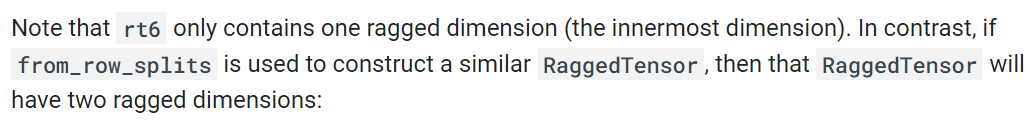

In [31]:
rt7 = tf.RaggedTensor.from_row_splits(values, [0, 2, 4])
print(rt7.shape)

(2, None, None)


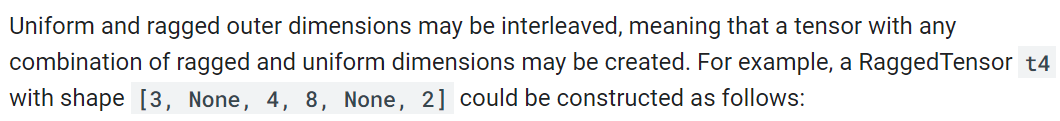

In [35]:
t0 = tf.zeros([1000, 2])                           # Shape:         [1000, 2]
t1 = RaggedTensor.from_row_lengths(t0, [...])      #           [160, None, 2]
t2 = RaggedTensor.from_uniform_row_length(t1, 8)   #         [20, 8, None, 2]
t3 = RaggedTensor.from_uniform_row_length(t2, 4)   #       [5, 4, 8, None, 2]
t4 = RaggedTensor.from_row_lengths(t3, [...])      # [3, None, 4, 8, None, 2]

ValueError: ignored

# Attributes